In [1]:
# Kütüphaneleri yüklüyoruz.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Veriyi yükledi df adlı değişkenimize atadık.
df = pd.read_csv('C:/Users/HP/Desktop/veri b projesi yorumsuz halleri/salary data.csv')

In [3]:
# İlk 5 satırımızı inceleyelim:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
3,38.0,Male,PhD,Senior Scientist,10.0,110000.0
4,29.0,Male,Master's,Software Developer,3.0,75000.0


In [4]:
# Kategorik verilerimizi inceleyelim
df.describe().T  #df.describe()

,count,mean,std,min,25%,50%,75%,max
Age,4217.0,33.946882,8.164202,22.0,28.0,31.0,39.0,62.0
Years of Experience,4217.0,8.475101,6.459880,0.0,3.0,7.0,12.0,34.0
Salary,4217.0,124808.953759,50051.564030,35000.0,80000.0,130000.0,170000.0,250000.0


In [5]:
# Sayısal verilerimizi inceleyelim
df.describe(include="object").T

,count,unique,top,freq
Gender,4217,3,Male,2593
Education Level,4217,6,Bachelor's Degree,1438
Job Title,4217,82,Software Engineer,518


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4217 non-null   float64
 1   Gender               4217 non-null   object 
 2   Education Level      4217 non-null   object 
 3   Job Title            4217 non-null   object 
 4   Years of Experience  4217 non-null   float64
 5   Salary               4217 non-null   float64
dtypes: float64(3), object(3)
memory usage: 197.8+ KB


In [7]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [8]:
df.shape

(4217, 6)

In [9]:
# Eksik veri var mı bakalım
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Eksik verileri ne yaparız ?

1. Eksik verilerin olduğu satırları silebiliriz.

2. Eksik verileri doldurabiliriz.

In [10]:
# Eksik veriye sahip satırları çıkarma
df = df.dropna()
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
3,38.0,Male,PhD,Senior Scientist,10.0,110000.0
4,29.0,Male,Master's,Software Developer,3.0,75000.0


In [11]:
# Tekrar kontrol edelim
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [12]:
df.shape

(4217, 6)

In [13]:
# 'Job Title' sütununda hangi mesleklerin olduğuna bir göz atalım
pd.unique(df["Job Title"])

array(['Software Engineer', 'Data Analyst', 'Marketing Analyst',
       'Senior Scientist', 'Software Developer', 'Financial Analyst',
       'Project Manager', 'Senior Engineer', 'Data Entry Clerk',
       'Business Analyst', 'IT Support', 'Software Manager',
       'Junior Developer', 'Product Designer', 'Data Scientist',
       'Technical Writer', 'Project Engineer', 'UX Designer',
       'Network Engineer', 'Help Desk Analyst',
       'Business Intelligence Analyst', 'Graphic Designer',
       'UX Researcher', 'Senior Data Scientist', 'Junior Accountant',
       'IT Manager', 'Senior Financial Analyst', 'Web Developer',
       'Research Director', 'Technical Support Specialist',
       'Senior Software Engineer', 'Chief Technology Officer',
       'Junior Designer', 'Senior Project Manager', 'Principal Scientist',
       'Research Scientist', 'Junior Software Developer',
       'Operations Analyst', 'Junior Web Developer',
       'Senior Project Coordinator', 'Chief Data Officer',


In [14]:
# Hangi meslekte kaç satır yani kaç çalışan olduğuna bakalım
df['Job Title'].value_counts()

Job Title
Software Engineer            518
Data Scientist               453
Software Engineer Manager    375
Data Analyst                 363
Senior Project Engineer      318
                            ... 
Software Project Manager       1
Supply Chain Analyst           1
Principal Engineer             1
Help Desk Analyst              1
Digital Content Producer       1
Name: count, Length: 82, dtype: int64

In [15]:
# 'Gender' sütunumuzdaki kategorilere ve sayılarına bakalım 
df['Gender'].value_counts()

Gender
Male      2593
Female    1610
Other       14
Name: count, dtype: int64

In [16]:
# Teknoloji ile doğrudan bağlantılı olmayan meslekleri seçelim
jobs_to_remove = ('Senior Manager', 'Sales Associate', 'Director', 'Product Manager', 'Sales Manager', 'Marketing Coordinator', 'HR Manager',
                  'Customer Service Rep', 'Operations Manager', 'Marketing Manager', 'Sales Director', 'VP of Operations', 
                  'Recruiter', 'Financial Manager', 'Social Media Specialist', 'Senior Consultant',  'CEO', 'Accountant',  'Marketing Specialist', 'HR Generalist', 
                  'Customer Success Rep', 'Sales Executive',  'Operations Director',  'Administrative Assistant', 'Strategy Consultant', 'Copywriter', 
                  'Account Manager', 'Director of Marketing', 'Customer Service Manager', 'Event Coordinator', 'VP of Finance',
                  'Social Media Manager', 'Director of Operations',  'Digital Marketing Manager', 'Customer Service Representative', 'Business Development Manager',
                  'Creative Director',  'Human Resources Director', 'Content Marketing Manager',  'Technical Recruiter', 'Sales Representative', 'Financial Advisor', 
                  'Junior Account Manager', 'Supply Chain Manager', 'Senior Marketing Manager','Training Specialist', 'Public Relations Manager', 'Product Marketing Manager',
                  'Senior HR Manager', 'Customer Success Manager', 'Senior Graphic Designer', 'Office Manager', 'Junior HR Generalist', 'Senior Product Manager', 
                  'Senior HR Generalist', 'Sales Operations Manager', 'Senior Training Specialist',  'Junior Sales Representative', 'Junior Marketing Manager', 
                  'Senior Product Marketing Manager', 'Senior Sales Manager', 'Junior Marketing Specialist',  'Senior Accountant', 'Director of Sales', 'Junior Recruiter', 
                  'Senior Business Development Manager', 'Junior Customer Support Specialist', 'Senior Operations Manager',  'Director of Human Resources', 
                  'Senior Sales Representative', 'Director of Product Management',  'Junior Copywriter', 'Senior Marketing Coordinator', 'Senior Human Resources Manager', 
                  'Junior Business Development Associate', 'Senior Account Manager', 'Junior HR Coordinator', 'Director of Finance', 'Junior Marketing Coordinator',
                  'Senior Human Resources Coordinator', 'Junior Product Manager', 'Senior Marketing Specialist', 'Director of Sales and Marketing', 'Senior Account Executive', 
                  'Director of Business Development', 'Junior Social Media Manager', 'Senior Human Resources Specialist','Director of Human Capital', 'Junior Advertising Coordinator', 
                  'Senior Marketing Director', 'Senior Financial Advisor', 'Junior Social Media Specialist', 'Junior Operations Manager', 'Senior Financial Manager', 
                  'Senior HR Specialist',  'Junior Operations Coordinator', 'Director of HR', 'Senior Operations Coordinator', 'Junior Financial Advisor', 
                  'Human Resources Coordinator','Human Resources Coordinator', 'Junior Sales Associate', 'Human Resources Manager', 'Juniour HR Generalist', 'Juniour HR Coordinator',
                  'Digital Marketing Specialist', 'Receptionist', 'Marketing Director', 'Social M', 'Social Media Man', 'Delivery Driver')

In [17]:
# Yeni bir veri seti oluşturuyoruz
df_other_jobs = pd.DataFrame() 

# önceden seçtiğimiz mesleklerin olduğu satırları veri setinden çekiyoruz
filtered_data = df[df['Job Title'].isin(jobs_to_remove)]

# ve yeni veri setine ekliyoruz
df_other_jobs = pd.concat([df_other_jobs, filtered_data], ignore_index=True)

In [18]:
print(df_other_jobs.shape)
df_other_jobs.head()

(0, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [19]:
df_other_jobs.to_csv('other jobs.csv', index=False)

In [20]:
# Bu meslekleri eğitimde kullanacağımız asıl veri setinden çıkarıyoruz
df = df[~df['Job Title'].isin(jobs_to_remove)]

In [21]:
print(df.shape)
df.head()

(4217, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
3,38.0,Male,PhD,Senior Scientist,10.0,110000.0
4,29.0,Male,Master's,Software Developer,3.0,75000.0


In [22]:
# Veri setini korelasyon için kopyaladık,
df_corr = df.copy()

# Veri Görselleştirme

In [23]:
# Kategorik sütunları belirliyoruz
categorical_columns = ['Gender', 'Education Level', 'Job Title']

# Label Encoding uyguladık
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

df_corr.head()

# One Hot Encoding 
# df_corr = pd.get_dummies(df1, columns=categorical_columns)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,72,5.0,90000.0
1,28.0,0,3,5,3.0,65000.0
2,29.0,1,0,37,2.0,55000.0
3,38.0,1,5,66,10.0,110000.0
4,29.0,1,3,71,3.0,75000.0


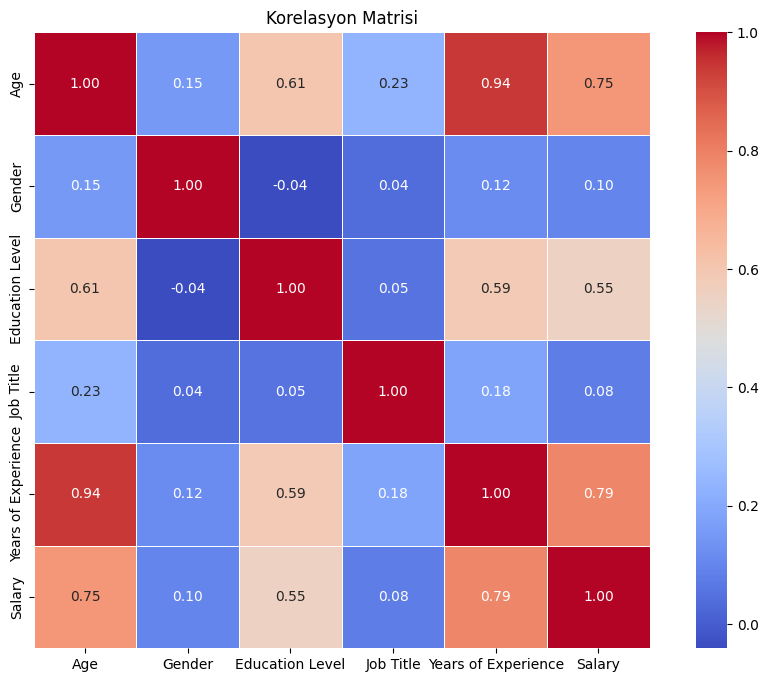

In [24]:
# Korelasyon matrisini hesaplıyoruz
correlation_matrix = df_corr.corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

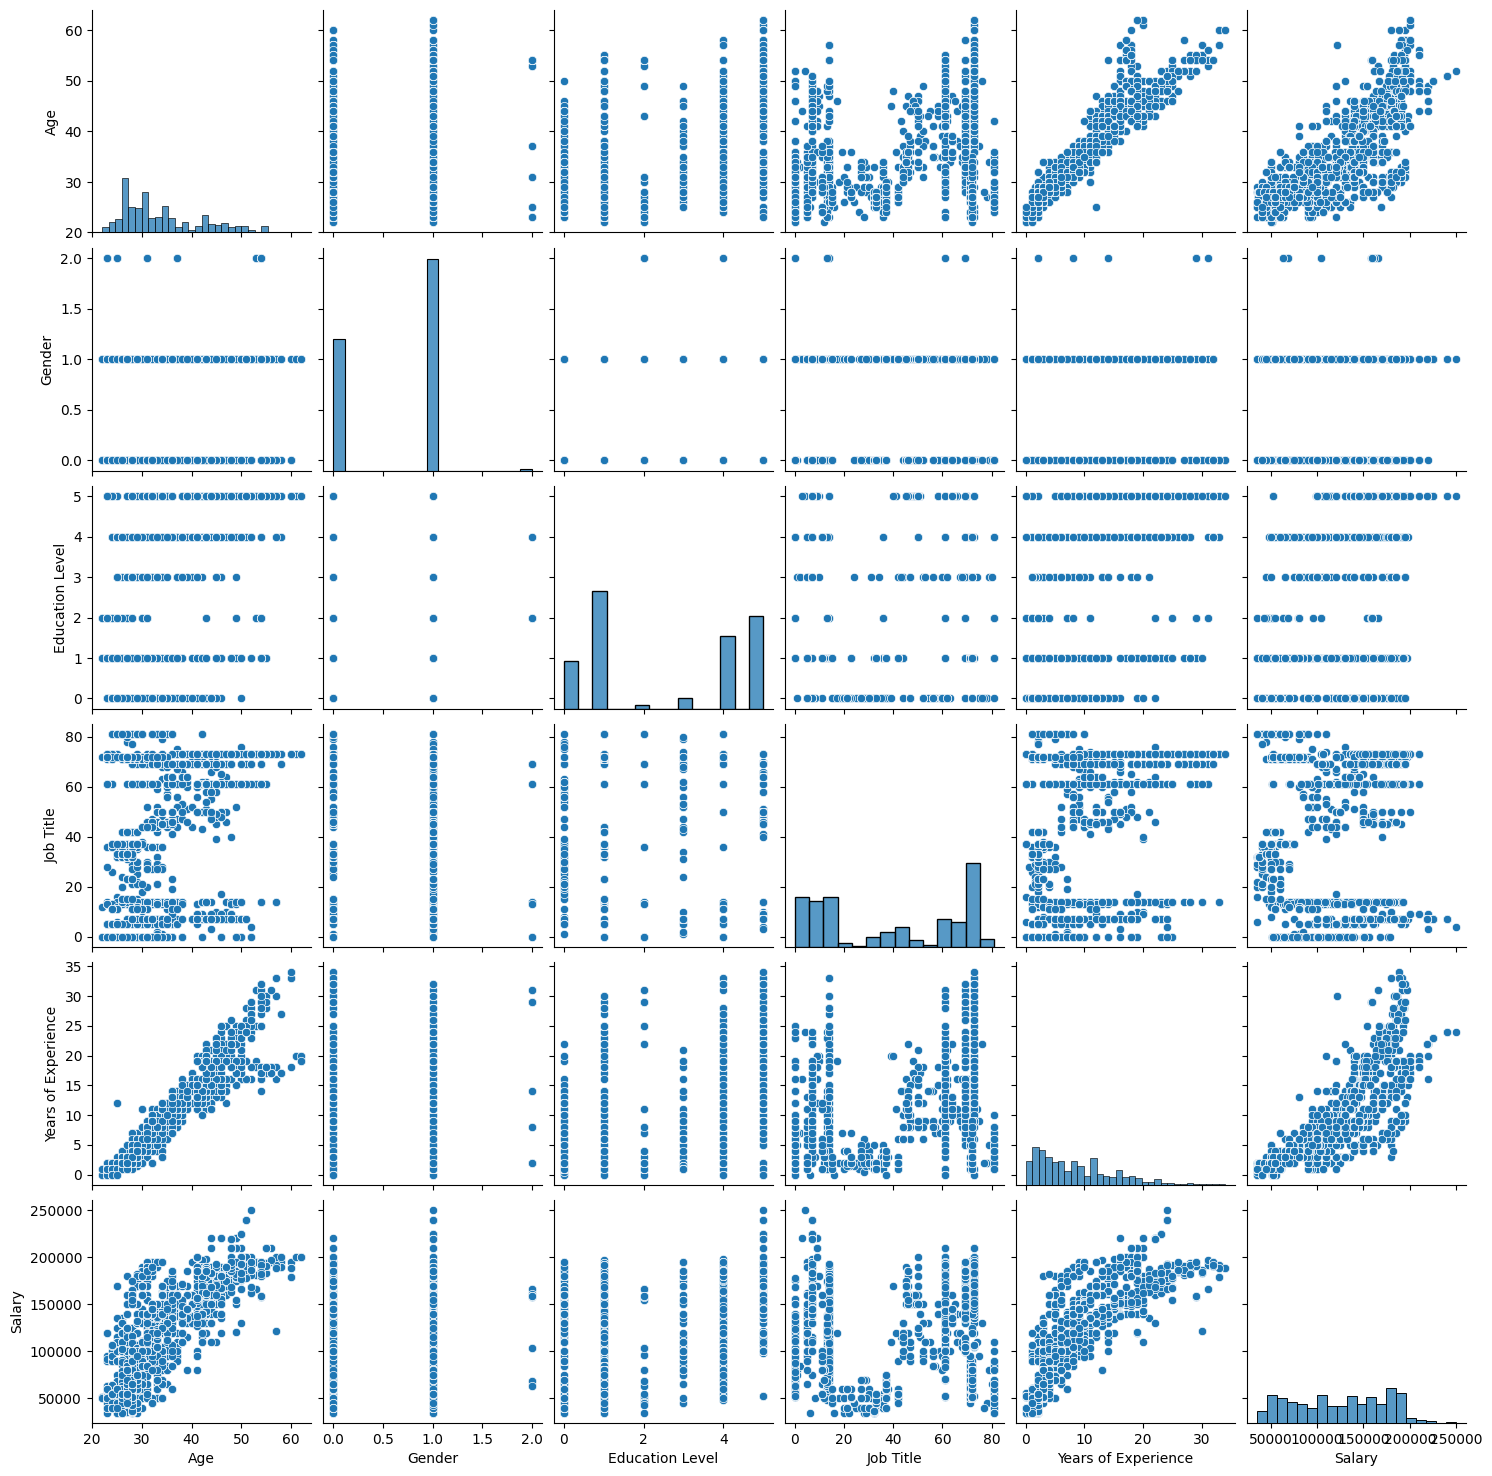

In [25]:
sns.pairplot(df_corr);

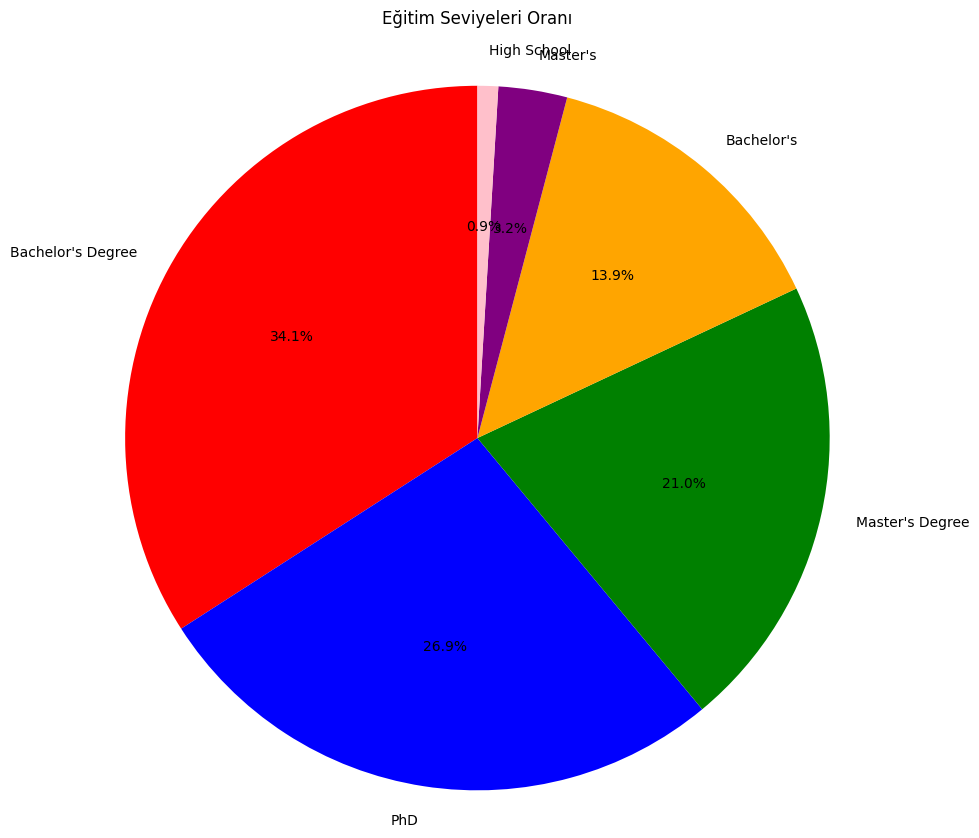

In [26]:
# Eğitim seviyelerinin sayısını hesapla
education_counts = df['Education Level'].value_counts()

# Pasta grafiği
plt.figure(figsize=(10, 10))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'orange', 'purple', 'pink'])
plt.title('Eğitim Seviyeleri Oranı\n')
plt.axis('equal')  # Daire şeklinde görünmesi için
plt.show()

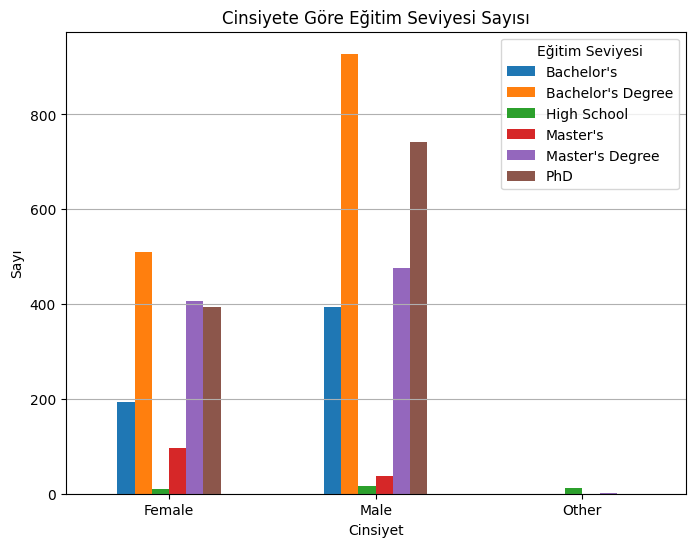

In [27]:
# Cinsiyete göre eğitim düzeyi sayısı bar chart grafiği ile inceleyelim
gender_and_education = df.groupby(['Gender', 'Education Level']).size().unstack(fill_value=0)

# Sütun grafiğini oluşturalım
gender_and_education.plot(kind='bar', figsize=(8, 6))
plt.title('Cinsiyete Göre Eğitim Seviyesi Sayısı')
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')
plt.grid(axis='y')            # Y ekseninde ızgara çizgileri
plt.xticks(rotation=0)        # X ekseni etiketlerini yatay yaz
plt.legend(title='Eğitim Seviyesi')
plt.show()

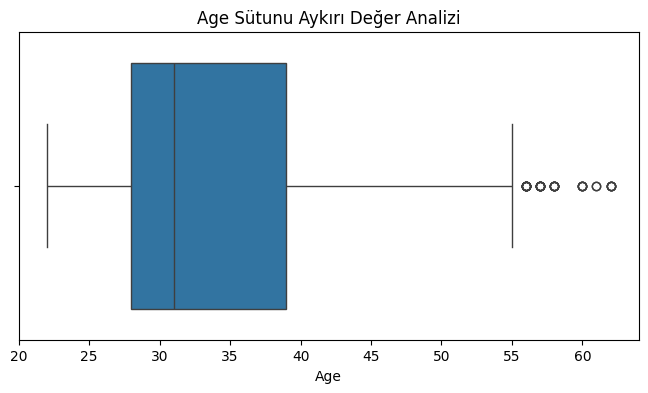

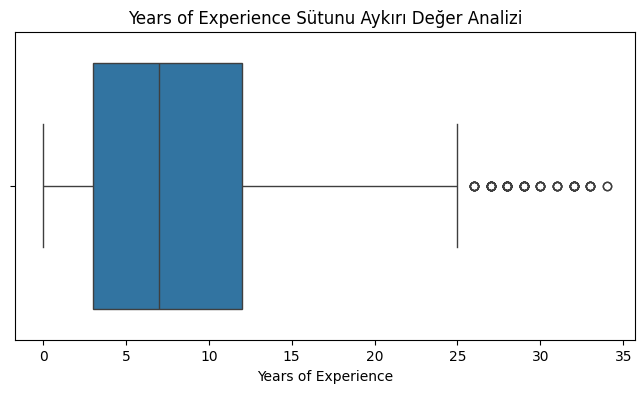

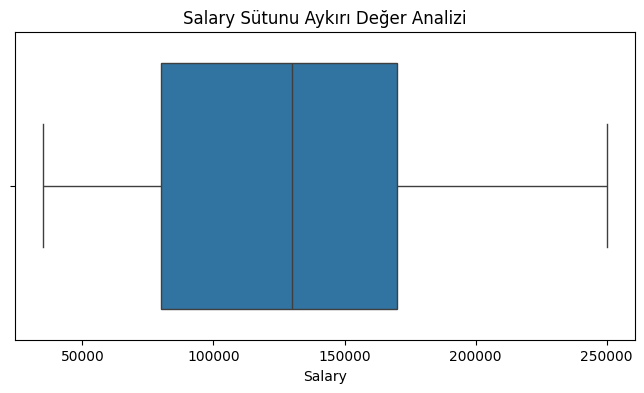

Aykırı Değerler:



,Age,Gender,Education Level,Job Title,Years of Experience,Salary
866,61.0,Male,PhD,Software Engineer Manager,20.0,200000.0
880,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
891,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0
913,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
915,60.0,Male,PhD,Software Engineer Manager,18.0,195000.0
...,...,...,...,...,...,...
2663,52.0,Female,PhD,Software Engineer Manager,29.0,194778.0
2680,54.0,Male,Master's Degree,Senior Software Engineer,32.0,195270.0
2706,54.0,Female,PhD,Software Engineer Manager,32.0,191510.0
2726,54.0,Male,PhD,Software Engineer Manager,30.0,184660.0


In [28]:
# Sayısal değişkenlerdeki aykırı değerleri boxplot ile kontrol ediyoruz
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'{col} Sütunu Aykırı Değer Analizi')
    plt.show()

# Aykırı değerleri Z-score yöntemi ile tespit etme
from scipy import stats
z_scores = np.abs(stats.zscore(df[numerical_columns]))
outliers = df[(z_scores > 3).any(axis=1)]
print("Aykırı Değerler:\n")
outliers

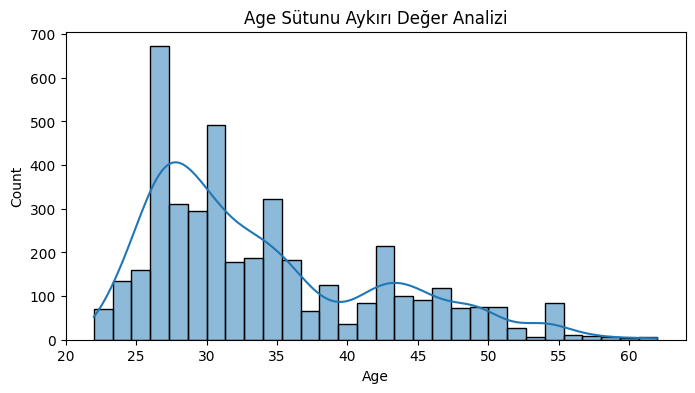

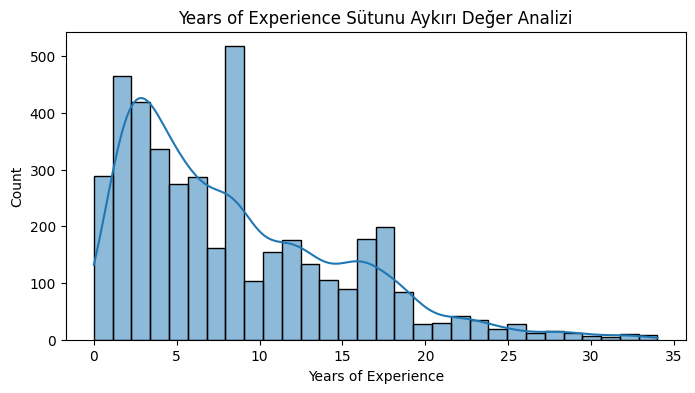

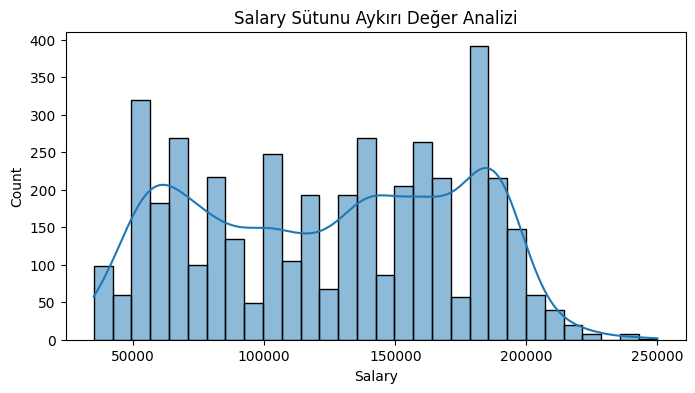

In [29]:
# Sayısal değişkenlerdeki aykırı değerleri boxplot ile kontrol etme
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=df[col],bins=30, kde=True)
    plt.title(f'{col} Sütunu Aykırı Değer Analizi')
    plt.show()

Salary Data Boxplot ve Histogram yoğunluk grafiklerine göre maaş aralığında aykırı görünmektedir. Bu değer dışında kalan aykırı değerleri kontrol edelim:

In [30]:
boolean = df.Salary < 4000
df[boolean]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [31]:
# Aykırı maaş değerlerini silelim
contrary_salaries = df['Salary'].nsmallest(3)
df = df[~df['Salary'].isin(contrary_salaries)]

#df = df[df['Salary'] >= 4000]     # 4000 in altında maaş olanları veri setinden düşürüyoruz
#df = df.drop([259, 1890, 2654])   # İndeks numarasına göre satırları siliyor

In [32]:
# Veri setini kaydetmek için
df.to_csv('salary data.csv', index=False)

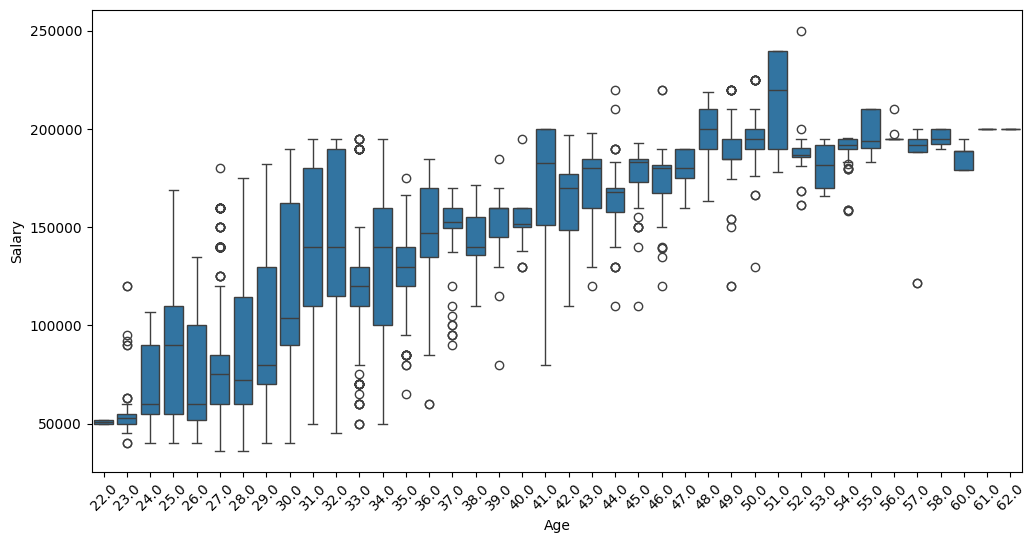

In [33]:
fig, ax = plt.subplots(figsize=(12, 6)) 
sns.boxplot(x= "Age", y="Salary",data=df);
plt.xticks(rotation=45)
plt.show()

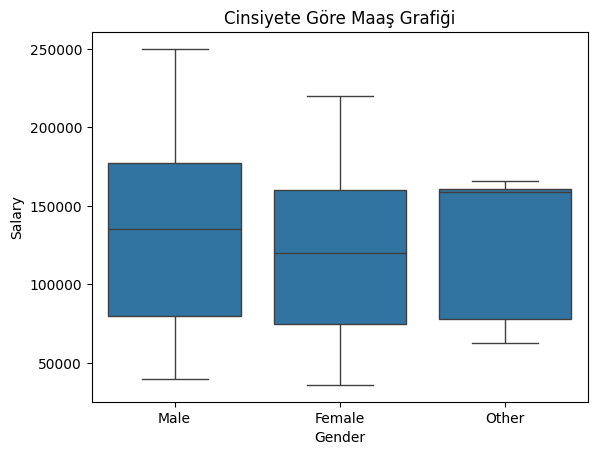

In [34]:
# 'Gender' ve  'Salary' Grafiği
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Cinsiyete Göre Maaş Grafiği')
plt.show()

Cinsiyete göre ortalama maaş grafiğinde kadınların ortalama maaşının daha az olduğunu görüyoruz.

C:\Users\HP\AppData\Local\Temp\ipykernel_15740\1942165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Salary', inner='quartile', palette='muted')


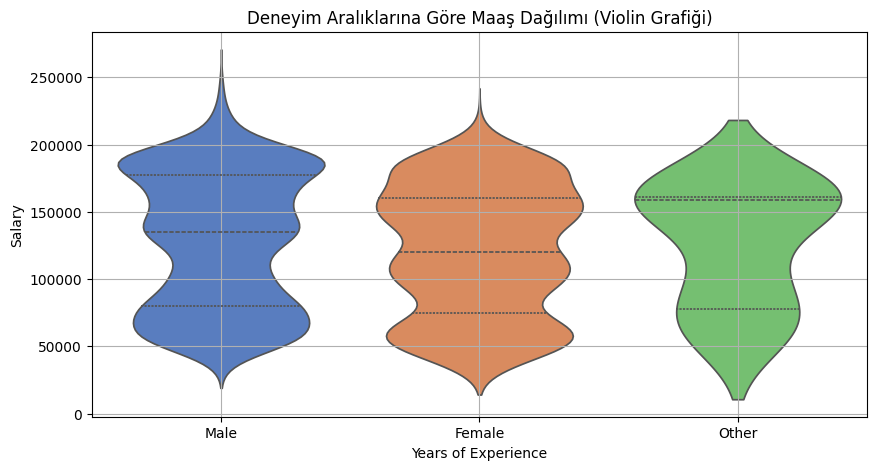

In [35]:
# Deneyim yılı, cinsiyet ve maaş verileri arasındaki ilişki: 
plt.figure(figsize=(10 , 5))
sns.violinplot(data=df, x='Gender', y='Salary', inner='quartile', palette='muted')
plt.title('Deneyim Aralıklarına Göre Maaş Dağılımı (Violin Grafiği)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

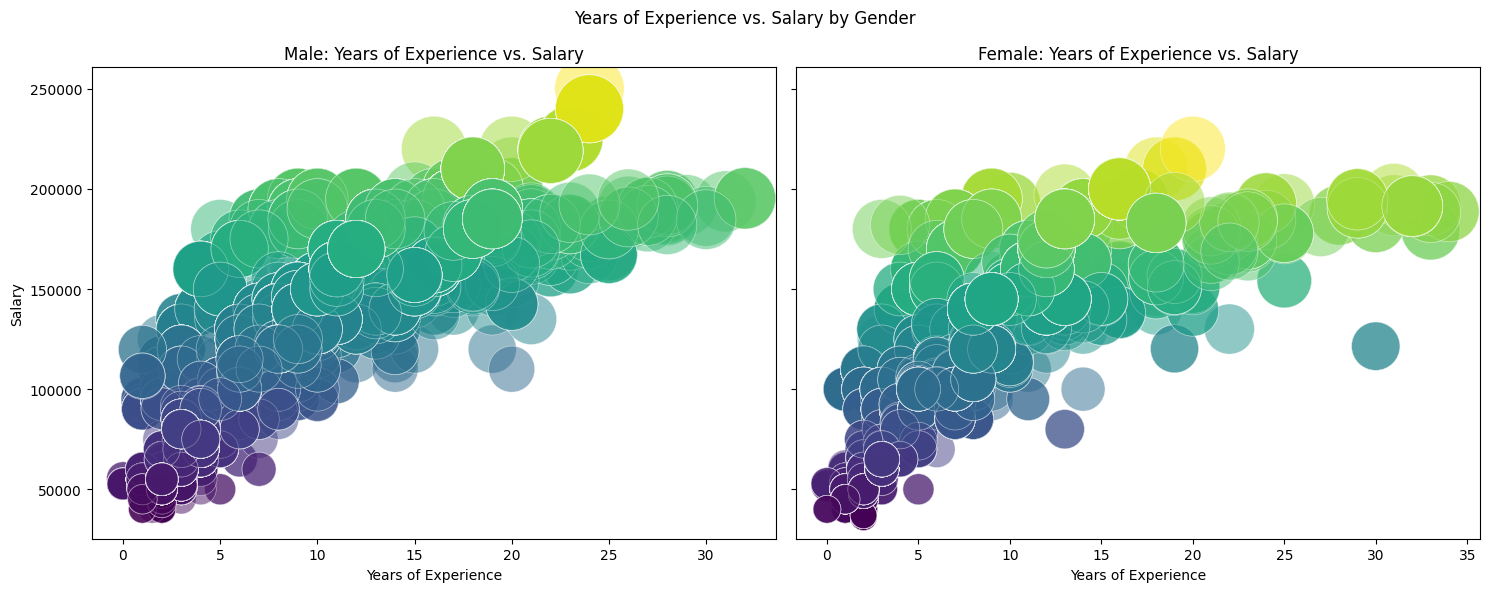

In [36]:
# Cinsiyete göre veri ayırma
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

# Alt grafikler oluşturma
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Erkekler için scatter plot
axs[0].scatter(male_df['Years of Experience'], male_df['Salary'], 
               s=male_df['Salary'] / 100, 
               alpha=0.5, 
               c=male_df['Salary'], 
               cmap='viridis', 
               edgecolors='w', 
               linewidth=0.5)
axs[0].set_title('Male: Years of Experience vs. Salary')
axs[0].set_xlabel('Years of Experience')
axs[0].set_ylabel('Salary')

# Kadınlar için scatter plot
axs[1].scatter(female_df['Years of Experience'], female_df['Salary'], 
               s=female_df['Salary'] / 100, 
               alpha=0.5, 
               c=female_df['Salary'], 
               cmap='viridis', 
               edgecolors='w', 
               linewidth=0.5)
axs[1].set_title('Female: Years of Experience vs. Salary')
axs[1].set_xlabel('Years of Experience')

# Genel başlık ve ayarlar
fig.suptitle('Years of Experience vs. Salary by Gender')
plt.tight_layout()
plt.show()


In [37]:
def gender_and_experience(job_title):
    subset = df[df['Job Title'] == job_title]
    
    if subset.empty:
        print(f"{job_title} mesleği için veri bulunamadı.")
        return
    
    male_count = df[(df['Gender'] == 'Male') & (df['Job Title'] == job_title)].shape[0]
    female_count = df[(df['Gender'] == 'Female') & (df['Job Title'] == job_title)].shape[0]
    print(f'{job_title} mesleğinde {male_count} erkek ve {female_count} kadın çalışan bulunuyor.\n')

    plt.figure(figsize = (8,6))
    sns.scatterplot(x = 'Salary', y = 'Years of Experience', hue = 'Gender', data=subset, sizes=(20, 200))
    plt.title('Seçili Meslekte Maaş - Deneyim - Cinsiyet Grafiği')
    plt.xlabel('Salary')
    plt.ylabel('Years Of Experience')
    plt.show() 

Software Engineer mesleğinde 325 erkek ve 193 kadın çalışan bulunuyor.



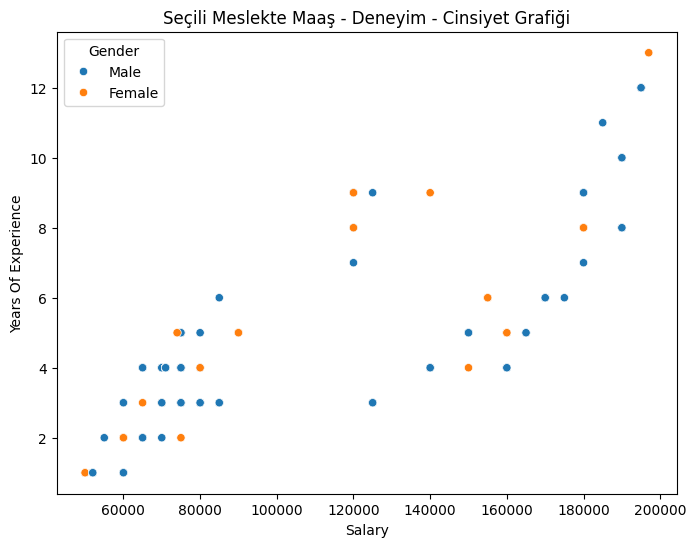

In [38]:
gender_and_experience('Software Engineer')

Software Developer mesleğinde 82 erkek ve 43 kadın çalışan bulunuyor.



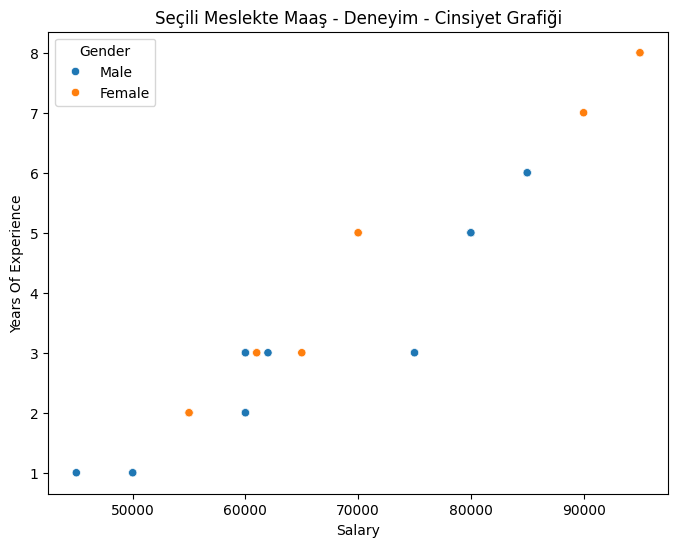

In [39]:
gender_and_experience('Software Developer')

Data Analyst mesleğinde 234 erkek ve 129 kadın çalışan bulunuyor.



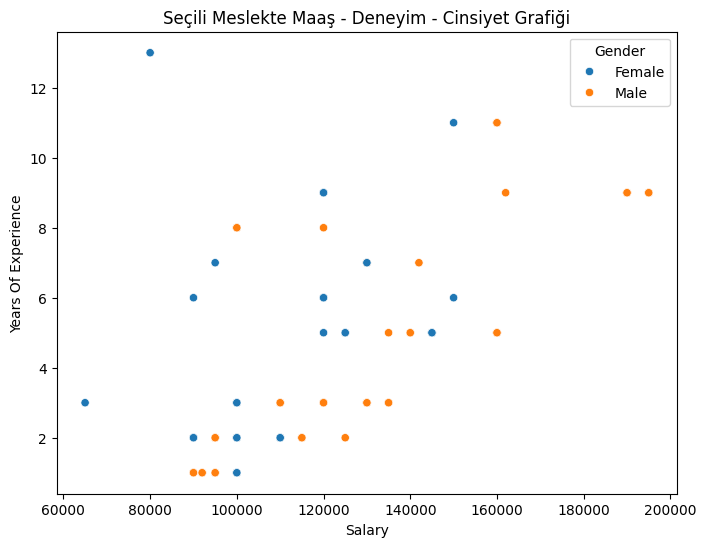

In [40]:
gender_and_experience('Data Analyst')

Data Scientist mesleğinde 251 erkek ve 202 kadın çalışan bulunuyor.



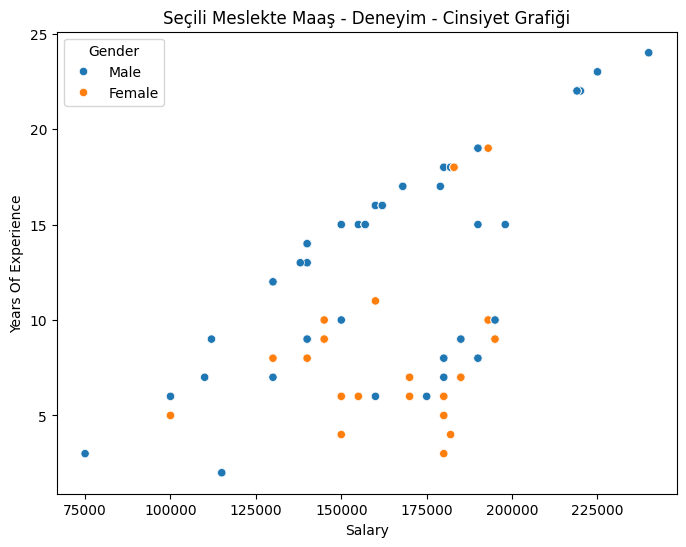

In [41]:
gender_and_experience('Data Scientist')

<Figure size 1000x800 with 0 Axes>

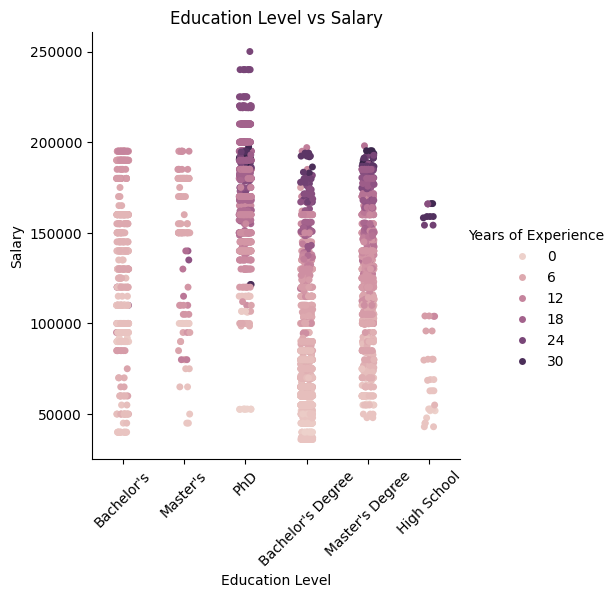

In [42]:
# Eğitim seviyesine göre maaş catplot grafiği
plt.figure(figsize =(10,8))
sns.catplot(x="Education Level", y="Salary", hue="Years of Experience", data=df);
plt.xticks(rotation=45)
plt.title("Education Level vs Salary")
plt.show()

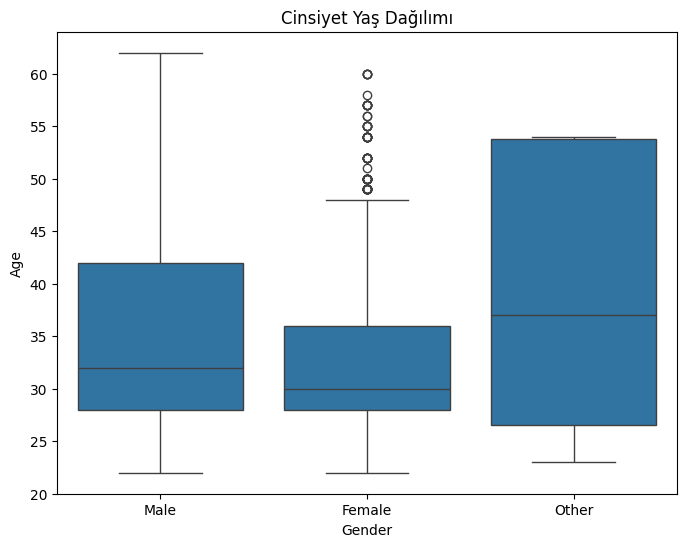

In [43]:
# 
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Gender', y = 'Age', data = df)
plt.title('Cinsiyet Yaş Dağılımı')
plt.show()

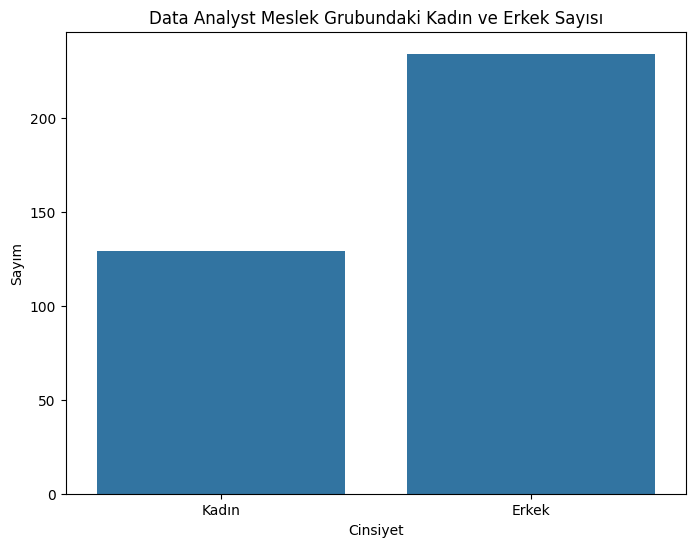

In [44]:
# Hangi meslekte kaç kadın ve erkek var?
def gender_count(job_title):
    # Kadın sayısını filtreleyelim
    female_count = df[(df['Gender'] == 'Female') & (df['Job Title'] == job_title)].shape[0]
    
    # Erkek sayısını filtreleyelim
    male_count = df[(df['Gender'] == 'Male') & (df['Job Title'] == job_title)].shape[0]
    
    # Sonuçları bir DataFrame'e yerleştiriyoruz
    gender_counts = {'Cinsiyet': ['Kadın', 'Erkek'], 'Sayım': [female_count, male_count]}
    gender_df = pd.DataFrame(gender_counts)
    
    # Grafik oluşturma
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Cinsiyet', y='Sayım', data=gender_df)
    plt.title(f'{job_title} Meslek Grubundaki Kadın ve Erkek Sayısı')
    plt.xlabel('Cinsiyet')
    plt.ylabel('Sayım')
    plt.show()

gender_count('Data Analyst')  

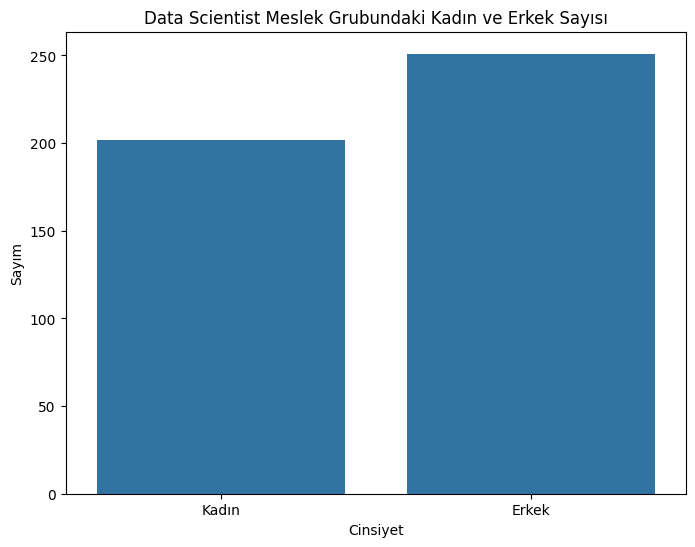

In [45]:
gender_count('Data Scientist')

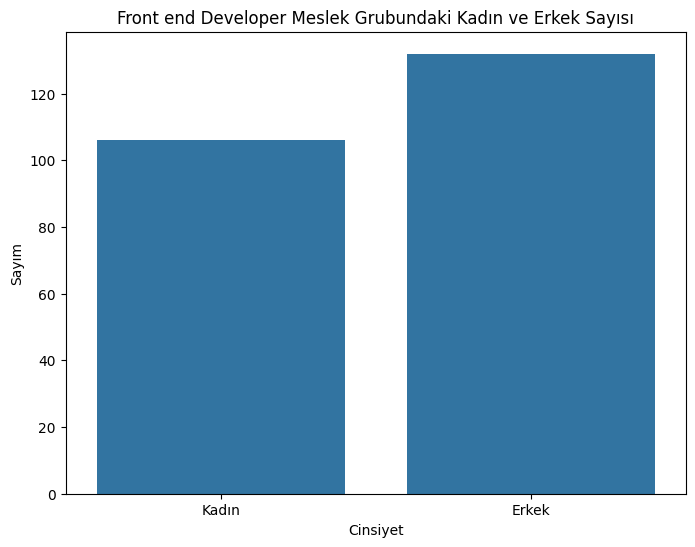

In [46]:
gender_count('Front end Developer')

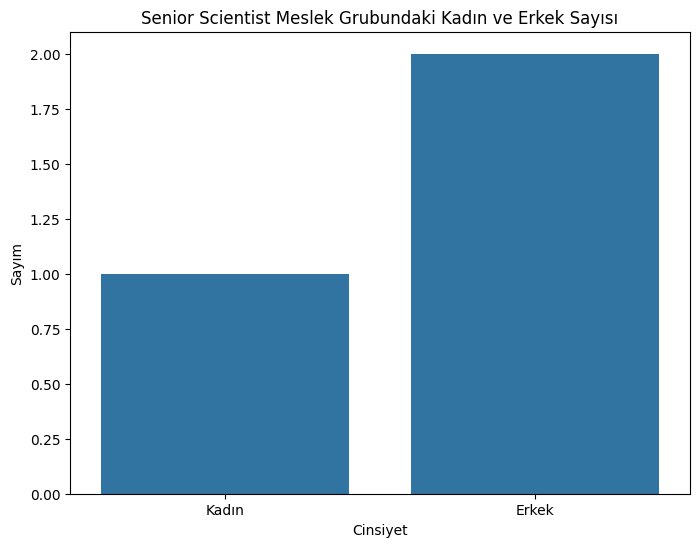

In [47]:
gender_count('Senior Scientist')

In [48]:
# Veri setini kopyaladık,
df_new = df.copy()

# Meslekleri gruplandırdık,
classifications = ['Engineer', 'Analyst', 'Associate', 'Director', 
                   'Coordinator', 'Scientist', 'Developer', 'Representative',
                   'Clerk', 'Rep', 'Support', 'Specialist', 'Consultant', 
                   'Designer', 'Writer', 'Generalist', 'Researcher', 
                   'Accountant', 'Recruiter', 'Officer', 'Advisor', 
                   'Producer', 'Copywriter']  

df_new['Job Classification'] = 'Other'

for classification in classifications:
    df_new.loc[df_new['Job Title'].str.contains(classification, case=False, na=False), 'Job Classification'] = classification

executives = ['CEO', 'VP', 'Executive', 'Man']
for executive in executives:
    df_new.loc[df_new['Job Title'].str.contains(executive, case=False, na=False), 'Job Classification'] = 'Executive' 

df_new.loc[df_new['Job Title'].str.contains('Manager', case=False, na=False), 'Job Classification'] = 'Manager'

print(df_new['Job Classification'].value_counts())

Job Classification
Engineer       1448
Developer       795
Scientist       638
Analyst         617
Manager         414
Director        134
Designer        109
Coordinator       5
Specialist        3
Consultant        2
Accountant        2
Researcher        2
Officer           2
Producer          1
Writer            1
Support           1
Other             1
Name: count, dtype: int64


In [49]:
# Meslekler için sözlük oluşturduk.
classification_dict = {
    'Engineer': ['Engineer'],
    'Administrative': ['Other', 'Associate', 'Clerk', 'Rep', 'Copywriter', 'Producer', 'Support', 'Coordinator'],
    'Specialist and Senior Specialist': ['Accountant', 'Generalist', 'Designer', 'Executive', 'Recruiter', 'Developer'],
    'Research & Advisory': ['Advisor', 'Analyst', 'Researcher', 'Consultant', 'Scientist'],
    'Managers': ['Manager'],
    'Executive': ['Director', 'Officer']
}

df_new['Job Classification 2'] = 'Other'

for new_classification, old_classifications in classification_dict.items():
    for old_classification in old_classifications:
        df_new.loc[df_new['Job Classification'] == old_classification, 'Job Classification 2'] = new_classification

print(df_new['Job Classification 2'].value_counts())

Job Classification 2
Engineer                            1448
Research & Advisory                 1259
Specialist and Senior Specialist     906
Managers                             414
Executive                            136
Administrative                         8
Other                                  4
Name: count, dtype: int64


                Job Classification 2  Gender  Average Salary
0                     Administrative  Female    80000.000000
1                     Administrative    Male    90000.000000
2                           Engineer  Female   121193.619289
3                           Engineer    Male   139561.093270
4                           Engineer   Other   142822.000000
5                          Executive  Female   178909.090909
6                          Executive    Male   183950.617284
7                           Managers  Female   165826.759259
8                           Managers    Male   167535.771242
9                              Other    Male    63750.000000
10               Research & Advisory  Female   134922.920892
11               Research & Advisory    Male   131365.535248
12  Specialist and Senior Specialist  Female    72486.906832
13  Specialist and Senior Specialist    Male    82619.801724
14  Specialist and Senior Specialist   Other    83489.500000


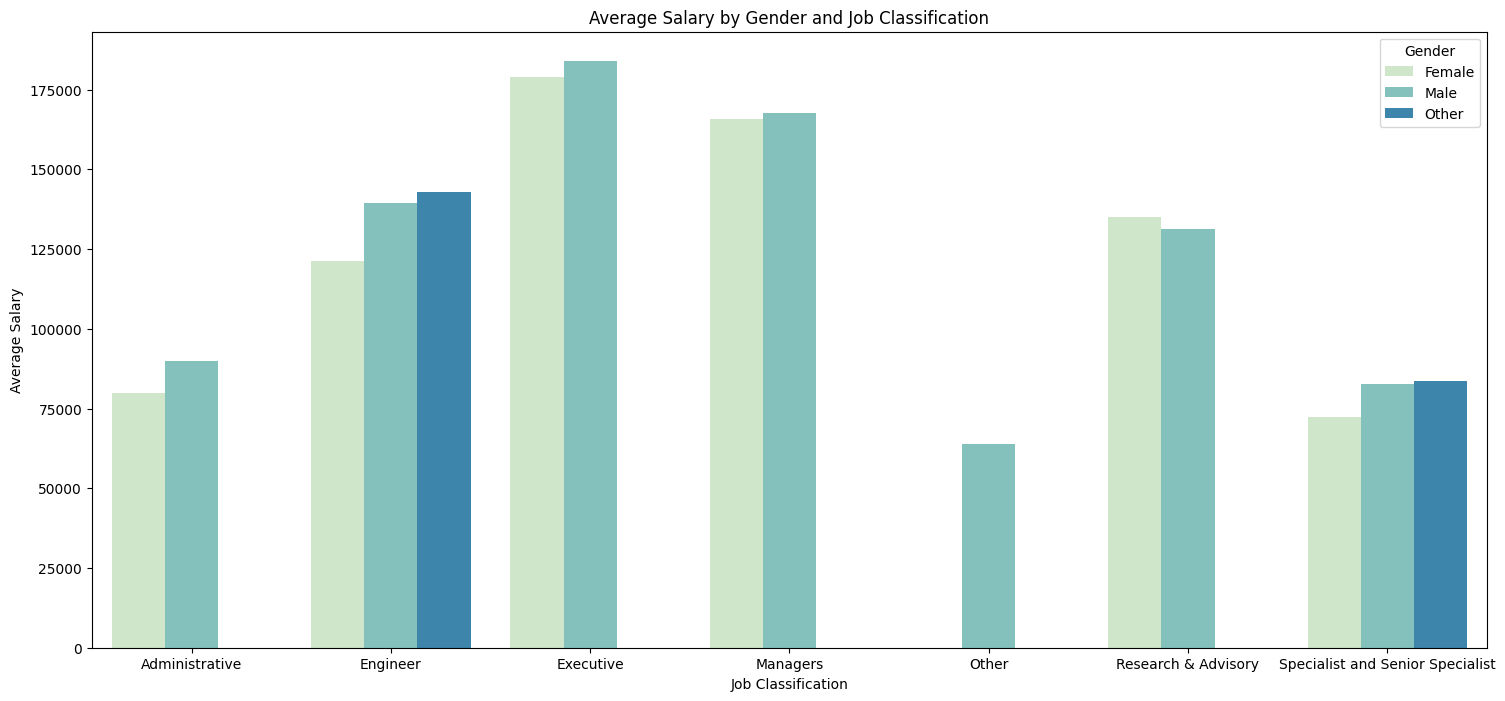

In [50]:
# Gruplandırdığımız mesleklerde cinsiyete göre maaş ortalamalarını aldık:
average_salaries = df_new.groupby(['Job Classification 2', 'Gender'])['Salary'].mean()
average_salaries = average_salaries.reset_index(name='Average Salary')

# ve grafik oluşturduk.
print(average_salaries)
plt.figure(figsize=(18, 8))
sns.barplot(x='Job Classification 2', y='Average Salary', hue='Gender', data=average_salaries, palette= 'GnBu')
plt.title('Average Salary by Gender and Job Classification')
plt.xlabel('Job Classification')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)  
plt.show()